In [19]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('medicine3.jpg')

# 변환 graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값 조절
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# mask
mask = 255 - mask

# morphology 적용
# borderconstant 사용
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# 저장
cv2.imwrite('translated2.png', result)

True

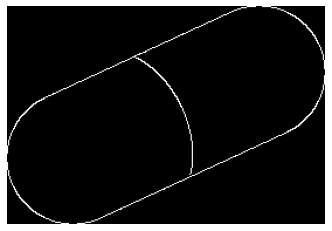

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_gray = cv2.imread("medicine2.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
from  PIL  import Image

img = cv.imread('medicine3.jpg', cv.IMREAD_UNCHANGED)
original = img.copy()

l = int(max(5, 6))
u = int(min(6, 6))

ed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.GaussianBlur(img, (21, 51), 3)
edges = cv.cvtColor(edges, cv.COLOR_BGR2GRAY)
edges = cv.Canny(edges, l, u)

_, thresh = cv.threshold(edges, 0, 255, cv.THRESH_BINARY  + cv.THRESH_OTSU)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=4)

data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

result = cv.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv.imwrite('bg.png', result)

img = Image.open('bg.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img.png", "PNG")

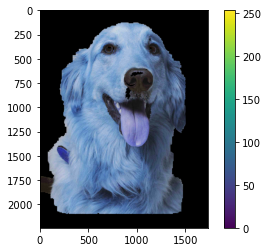

(<matplotlib.image.AxesImage at 0x14894f99910>,
 None)

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('49.golden-retriever-dog-face.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,100,1500,2000)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

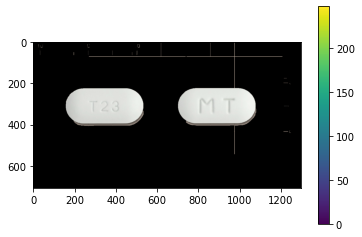

(<matplotlib.image.AxesImage at 0x14899c0b370>,
 None)

In [32]:
#Grab-cut 알고리즘을 사용하여 전경 추출
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
img = cv2.imread('medicine3.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# Step 1
#전경 추출을 위한 사각영역 지정
rect = (0,0,1250,650)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
# Step 2
#마킹을 통한 전경 이미지 추출
newmask = cv2.imread('newmask2.png',0)
mask[newmask == 0] = 0
mask[newmask == 255] = 1
cv2.grabCut(img,mask,None,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()